In [1]:
# Reconnaissance des caractères 1,U,P,O,C,A dans cet ordre.

from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# Récupération des images sous forme de vecteurs, et création de la matrice M 36*6
Test1 = np.ravel(io.imread('Caracteres/Test1.bmp'))
TestU = np.ravel(io.imread('Caracteres/TestU.bmp'))
TestP = np.ravel(io.imread('Caracteres/TestP.bmp'))
TestO = np.ravel(io.imread('Caracteres/TestO.bmp'))
TestC = np.ravel(io.imread('Caracteres/TestC.bmp'))
TestA = np.ravel(io.imread('Caracteres/TestA.bmp'))

M = np.transpose(np.array([Test1,TestU,TestP,TestO,TestC,TestA]))

M[M == 255] = 1

def sortie(P,f,a=0.5) :
    Msortie = f(np.dot(P,M),a)
    
    erreur = np.sum((Msortie - np.identity(6))**2)
    return(erreur)

def s(x,a):
    return(1/(1+np.exp(-a*x)))

def s2(z,a):
    if type(z) == np.ndarray :
        z[z > 0] = 1
        z[z < 0] = 0
        return(z)
    else :
        if z > 0 :
            return(1)
        else :
            return(0)

def s3(z,a):
    if type(z) == np.ndarray :
        z[z > a] = 1
        z[z < a] /=a
        z[z < 0] = 0
        return(z)
    else :
        print('wtf')
        if (z > 0) and (z<a):
            return(z/a)
        elif z>a :
            return(1)
        else :
            return(0)

def algo_gene(f=s,prec=0.0001,taille_pop=30,nb_im=6, a=0.5, tmax=50000):
    # Cette version de l'algorithme entraine le réseau et retourne l'erreur après entrainement
    # La version en dessous permet de tester l'algorithme après entrainement
    
    #on crée la pop initiale des matrices de poids dans la plage de recherche : [-10;10]
    pop = 20*(np.random.random((taille_pop,nb_im,36))-(1/2))
    
    erreurs = np.ones(taille_pop)
    meilleur_res = erreurs[0]
    t=0
    
    ploterreurs = [[],[]]

    while (meilleur_res > prec) and (t<tmax):
    
        #On itère l'algo géné :
        t+=1
        # Pour chaque élt de la population
        for i in range(taille_pop):
            # On récupère sa performance : sortie et erreur; et on les mets dans des listes
            elt = pop[i]
            err = sortie(elt,f,a)
            erreurs[i] = err
        
        # On trie les erreurs par performance et on récupère les positions correspondantes dans la population
        
        ordre = np.argsort(erreurs)
        
        ploterreurs[1].append(erreurs[ordre[0]])
        ploterreurs[0].append(t)                     
        meilleur_res = erreurs[ordre[0]]
        
        #Les meilleurs individus sont conservés

        #Les bons individus sont des reproduction d'un des meilleurs individus avec un bon individu
        for k in range(4, int(taille_pop/3)):
            pere = int(4*np.random.random())
            mere = int((np.floor(taille_pop/3)+1)*np.random.random())

            # Remarque : pourquoi un père et une mère et par deux pères ? 
            # pourquoi la mère est un moins bon individu que le père ?

            pop[ordre[k]] = (pop[ordre[pere]] + pop[ordre[mere]])/2

        #Les individus corrects sont mutés
        for k in range(int(taille_pop/3)+1,2*int(taille_pop/3)):
            i = int(6*np.random.random())
            j = int(36*np.random.random())
            mutation = 20*(np.random.random()-(1/2))

            pop[ordre[k]][i][j] = mutation

        #Les mauvais individus sont remplacés par une mutation du meilleur individu
        for k in range(2*int(taille_pop/3)+1,taille_pop-int(taille_pop/5)):
            pere = pop[ordre[0]]
            i = int(6*np.random.random())
            j = int(36*np.random.random())
            mutation = 20*(np.random.random()-(1/2))
            pere[i][j] = np.max((-10,mutation))
            pop[ordre[k]] = pere

        # Les pires individus sont pris au hasard
        for k in range(taille_pop-int(taille_pop/5)+1, taille_pop):
            nouvel_ind = 20*(np.random.random((nb_im,36))-(1/2))

            pop[ordre[k]] = nouvel_ind
    
    return(ploterreurs,meilleur_res)



1.0783616459575023
0.0009634742555510423
8.05121616768767e-06


d:\logiciels_divers\miniconda\miniconda_intallation\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in exp


1.6299627883629752e-14


d:\logiciels_divers\miniconda\miniconda_intallation\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in exp


1.105013674621306e-08


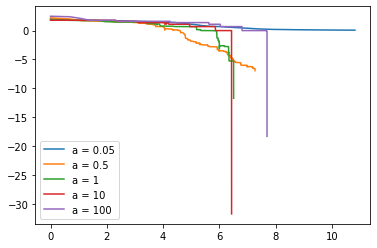

0.0


d:\logiciels_divers\miniconda\miniconda_intallation\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


0.0


d:\logiciels_divers\miniconda\miniconda_intallation\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


0.0


d:\logiciels_divers\miniconda\miniconda_intallation\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


0.0


d:\logiciels_divers\miniconda\miniconda_intallation\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


0.0


d:\logiciels_divers\miniconda\miniconda_intallation\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


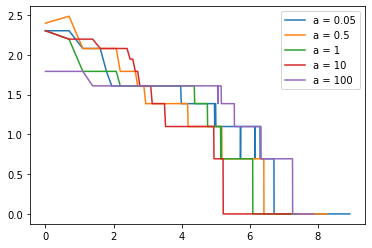

0.0


d:\logiciels_divers\miniconda\miniconda_intallation\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


0.0


d:\logiciels_divers\miniconda\miniconda_intallation\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


0.0


d:\logiciels_divers\miniconda\miniconda_intallation\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


0.010005111205610455
1.1398118661951275


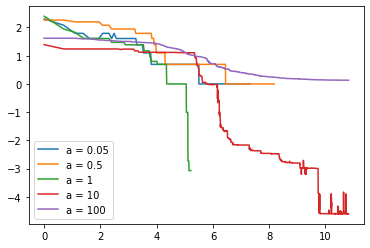

0.0


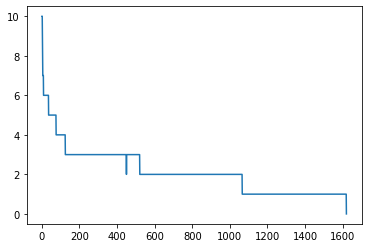

In [3]:
precision = 0.001
tmax = 50000
vals_a = [0.05,0.5,1,10,100]
fonctions = [s,s2,s3]

# Pour chaque fonction, on trace sur un même graphe le log des erreurs obtenues pour plusieurs valeurs de a 
for j in range(len(fonctions)):
    f = fonctions[j]
    plt.figure(j+1)
    
    for i in range(len(vals_a)):
        a = vals_a[i]
        ploterreurs,resultat = algo_gene(f=fonctions[j],prec=precision,taille_pop=30,nb_im=6, a=a,tmax=tmax)
        print(resultat) 
        label = 'a = '+str(a)
        plt.plot(np.log(ploterreurs[0]),np.log(ploterreurs[1]),label = label)
    plt.legend()
    plt.show()

    

f = s2
plt.figure(3)

a = 0.5
ploterreurs, resultat = algo_gene(f=f,prec=precision,taille_pop=30,nb_im=6, a=a, tmax=tmax)
print(resultat)
plt.plot(ploterreurs[0],ploterreurs[1])

plt.show()

In [4]:
# Avec les résultats précédents, on choisit s1 avec a = 1
f = s
a = 1
# On va maintenant tester les résultats sur le fichier Testprime.bmp
Testprime = np.ravel(io.imread('Caracteres/Caracteres/Testprime.bmp'))

def test_algo_gene(f=s,prec=0.0005,taille_pop=30,nb_im=6, a=0.5, tmax=50000):
    
    #on crée la pop initiale des matrices de poids dans la plage de recherche : [-10;10]
    pop = 20*(np.random.random((taille_pop,nb_im,36))-(1/2))
    
    erreurs = np.ones(taille_pop)
    meilleur_res = erreurs[0]
    t=0
    
    ploterreurs = [[],[]]

    while (meilleur_res > prec) and (t<tmax):
    
        #On itère l'algo géné :
        t+=1
        # Pour chaque élt de la population
        for i in range(taille_pop):
            # On récupère sa performance : sortie et erreur; et on les mets dans des listes
            elt = pop[i]
            err = sortie(elt,f,a)
            erreurs[i] = err
        
        # On trie les erreurs par performance et on récupère les positions correspondantes dans la population
        
        ordre = np.argsort(erreurs)
        
        ploterreurs[1].append(erreurs[ordre[0]])
        ploterreurs[0].append(t)                     
        meilleur_res = erreurs[ordre[0]]
        
        #Les meilleurs individus sont conservés

        #Les bons individus sont des reproduction d'un des meilleurs individus avec un bon individu
        for k in range(4, int(taille_pop/3)):
            pere = int(4*np.random.random())
            mere = int((np.floor(taille_pop/3)+1)*np.random.random())

            # Remarque : pourquoi un père et une mère et par deux pères ? 
            # pourquoi la mère est un moins bon individu que le père ?

            pop[ordre[k]] = (pop[ordre[pere]] + pop[ordre[mere]])/2

        #Les individus corrects sont mutés
        for k in range(int(taille_pop/3)+1,2*int(taille_pop/3)):
            i = int(6*np.random.random())
            j = int(36*np.random.random())
            mutation = 20*(np.random.random()-(1/2))

            pop[ordre[k]][i][j] = mutation

        #Les mauvais individus sont remplacés par une mutation du meilleur individu
        for k in range(2*int(taille_pop/3)+1,taille_pop-int(taille_pop/5)):
            pere = pop[ordre[0]]
            i = int(6*np.random.random())
            j = int(36*np.random.random())
            mutation = 20*(np.random.random()-(1/2))
            pere[i][j] = np.max((-10,mutation))
            pop[ordre[k]] = pere

        # Les pires individus sont pris au hasard
        for k in range(taille_pop-int(taille_pop/5)+1, taille_pop):
            nouvel_ind = 20*(np.random.random((nb_im,36))-(1/2))

            pop[ordre[k]] = nouvel_ind
    
    # L'algorithme est maintenant entrainé, on retourne la version finale des poids pour test
    
    Poids = pop[ordre[0]]
    
    return(Poids)

# Test de l'algorithme :

P = test_algo_gene(f=f,prec=0.0005,taille_pop=30,nb_im=6, a=a, tmax=50000)

resultat = f(np.dot(P,Testprime),a)

print(resultat)

[1. 0. 0. 0. 0. 0.]


d:\logiciels_divers\miniconda\miniconda_intallation\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in exp


In [5]:
from mpl_toolkits.mplot3d import Axes3D
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

#Tracé d'histogrammes
def histogram3D(M_sortie):
    matrix = M_sortie
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xpos = [range(matrix.shape[0])]
    ypos = [range(matrix.shape[1])]
    xpos, ypos = np.meshgrid(xpos, ypos)
    xpos = xpos.flatten('F')
    ypos = ypos.flatten('F')
    zpos = np.zeros_like(xpos)
    
    dx = 0.5 * np.ones_like(zpos)
    dy = dx.copy()
    dz = matrix.flatten()
    
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')


# Même algorithme que précédemment, modifié pour s'adapter aux nouvelles images en entrée
# Retourne 
def sortie(P,M,nb_im,f,a=1) :
    Msortie = f(np.dot(P,M),a)
    
    erreur = np.sum((Msortie - np.identity(nb_im))**2)
    return(erreur)

def s(x,a=0.5):
    return(1/(1+np.exp(-a*x)))

def algo_gene(M,f=s,prec=0.001,taille_pop=30,nb_im=6, a=0.5, tmax=50000):
    #on crée la pop initiale des matrices de poids dans la plage de recherche : [-20;20]
    pop = 40*(np.random.random((taille_pop,nb_im,36))-(1/2))
    
    erreurs = np.ones(taille_pop)
    meilleur_res = erreurs[0]
    t=0
    
    ploterreurs = [[],[]]

    while (meilleur_res > prec) and (t<tmax):
    
        #On itère l'algo géné :
        t+=1
        # Pour chaque élt de la population
        for i in range(taille_pop):
            # On récupère sa performance : sortie et erreur; et on les mets dans des listes
            elt = pop[i]
            err = sortie(elt,M,nb_im,f,a)
            erreurs[i] = err
        
        # On trie les erreurs par performance et on récupère les positions correspondantes dans la population
        
        ordre = np.argsort(erreurs)
        
        ploterreurs[1].append(erreurs[ordre[0]])
        ploterreurs[0].append(t)                     
        meilleur_res = erreurs[ordre[0]]
        
        #Les meilleurs individus sont conservés

        #Les bons individus sont des reproduction d'un des meilleurs individus avec un bon individu
        for k in range(4, int(taille_pop/3)):
            pere = int(4*np.random.random())
            mere = int((np.floor(taille_pop/3)+1)*np.random.random())

            pop[ordre[k]] = (pop[ordre[pere]] + pop[ordre[mere]])/2

        #Les individus corrects sont mutés
        for k in range(int(taille_pop/3)+1,2*int(taille_pop/3)):
            i = int(nb_im*np.random.random())
            j = int(36*np.random.random())
            mutation = 40*(np.random.random()-(1/2))

            pop[ordre[k]][i][j] = mutation

        #Les mauvais individus sont remplacés par une mutation du meilleur individu
        for k in range(2*int(taille_pop/3)+1,taille_pop-int(taille_pop/5)):
            pere = pop[ordre[0]]
            i = int(nb_im*np.random.random())
            j = int(36*np.random.random())
            mutation = 40*(np.random.random()-(1/2))
            pere[i][j] = np.max((-10,mutation))
            pop[ordre[k]] = pere

        # Les pires individus sont pris au hasard
        for k in range(taille_pop-int(taille_pop/5)+1, taille_pop):
            nouvel_ind = 20*(np.random.random((nb_im,36))-(1/2))

            pop[ordre[k]] = nouvel_ind
    
    P = pop[ordre[0]]
    Msortie = f(np.dot(P,M),a)
    return(ploterreurs,Msortie,P)

Réseau 1


<Figure size 432x288 with 0 Axes>

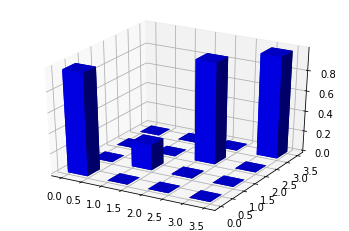

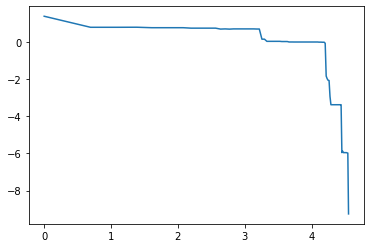

[1 0 0 0]
[0 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 1 0]
[0 0 1 1]
[0 0 1 0]
[0 0 0 1]
[0 0 1 1]
[0 0 1 1]
[0 1 0 0]
[0 0 1 0]


d:\logiciels_divers\miniconda\miniconda_intallation\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


In [6]:
# Import des images :

images = []

for i in range(10):
    images.append(np.ravel(io.imread('Caracteres/Caracteres/'+str(i)+'.bmp')))

images.append(np.ravel(io.imread('Caracteres/Caracteres/+.bmp')))    
images.append(np.ravel(io.imread('Caracteres/Caracteres/-.bmp')))
                       
# Réseau 1
print("Réseau 1")
# Entrainement 


M = np.transpose(np.array([images[0],images[1],images[2],images[3]]))
M[M == 255] = 1

ploterreurs,Msortie,P0123 = algo_gene(M,f=s,prec=0.001,taille_pop=30,nb_im=4, a=0.5, tmax=50000)

plt.figure()
histogram3D(Msortie)
plt.show()
plt.figure()
plt.plot(np.log(ploterreurs[0]),np.log(ploterreurs[1]))
plt.show()

# Test

for i in range(0,12):
    Test = s(np.dot(P0123,images[i])).astype(int)
    print(Test)


Réseau 2


<Figure size 432x288 with 0 Axes>

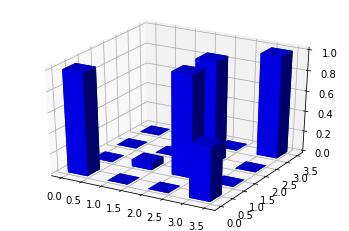

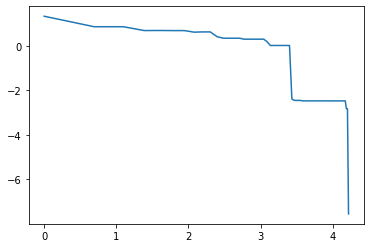

[0 0 1 0]
[1 1 1 0]
[0 0 1 1]
[0 1 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 1 0]
[0 0 0 1]
[0 0 1 0]
[0 0 1 0]
[0 0 0 0]
[0 0 0 1]


d:\logiciels_divers\miniconda\miniconda_intallation\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


In [7]:
# Réseau 2
print("Réseau 2")
# Entrainement 

M = np.transpose(np.array([images[4],images[5],images[6],images[7]]))
M[M == 255] = 1

ploterreurs,Msortie,P4567 = algo_gene(M,f=s,prec=0.001,taille_pop=30,nb_im=4, a=1, tmax=50000)

plt.figure()
histogram3D(Msortie)
plt.show()
plt.figure()
plt.plot(np.log(ploterreurs[0]),np.log(ploterreurs[1]))
plt.show()

# Test

for i in range(0,12):
    Test = s(np.dot(P4567,images[i])).astype(int)
    print(Test)

Réseau 3


<Figure size 432x288 with 0 Axes>

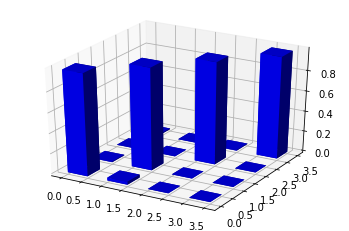

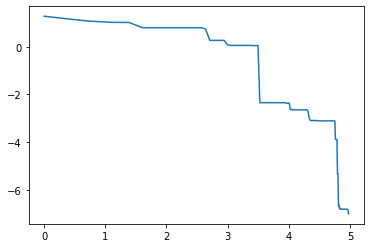

[1 1 1 0]
[0 0 1 0]
[1 1 1 0]
[0 1 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 1 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]


d:\logiciels_divers\miniconda\miniconda_intallation\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


In [8]:
# Réseau 3
print("Réseau 3")
# Entrainement 

M = np.transpose(np.array([images[8],images[9],images[10],images[11]]))
M[M == 255] = 1

ploterreurs,Msortie,P89pm = algo_gene(M,f=s,prec=0.001,taille_pop=30,nb_im=4, a=0.5, tmax=50000)

plt.figure()
histogram3D(Msortie)
plt.show()
plt.figure()
plt.plot(np.log(ploterreurs[0]),np.log(ploterreurs[1]))
plt.show()

# Test

for i in range(0,12):
    Test = s(np.dot(P89pm,images[i])).astype(int)
    print(Test)

Réseau 4


<Figure size 432x288 with 0 Axes>

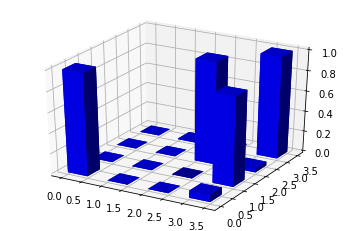

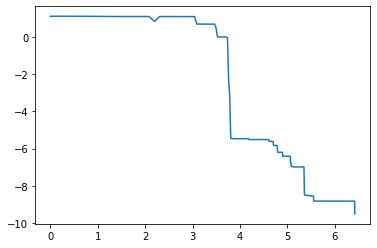

[0 0 1 0]
[0 1 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 1 1]
[0 0 0 1]
[0 0 0 0]
[0 0 1 0]
[0 1 0 1]
[0 0 0 1]
[0 0 0 0]
[0 0 1 0]


d:\logiciels_divers\miniconda\miniconda_intallation\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


In [9]:
# Réseau 4
print("Réseau 4")
# Entrainement 

M = np.transpose(np.array([images[3],images[5],images[7],images[9]]))
M[M == 255] = 1

ploterreurs,Msortie,P3579 = algo_gene(M,f=s,prec=0.0001,taille_pop=30,nb_im=4, a=1, tmax=50000)

plt.figure()
histogram3D(Msortie)
plt.show()
plt.figure()
plt.plot(np.log(ploterreurs[0]),np.log(ploterreurs[1]))
plt.show()

# Test

for i in range(0,12):
    Test = s(np.dot(P3579,images[i])).astype(int)
    print(Test)

Réseau 5


<Figure size 432x288 with 0 Axes>

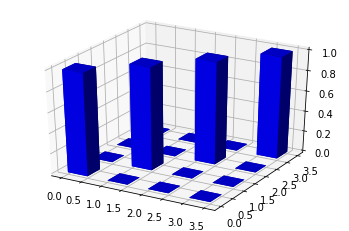

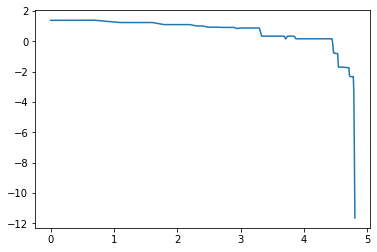

[1 0 1 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 1]
[0 1 0 0]
[0 0 0 0]
[0 0 1 0]
[0 1 0 0]
[0 0 0 1]
[0 1 0 1]
[1 0 1 1]
[0 0 1 1]


d:\logiciels_divers\miniconda\miniconda_intallation\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


In [10]:
# Réseau 5
print("Réseau 5")
# Entrainement 

M = np.transpose(np.array([images[2],images[4],images[6],images[8]]))
M[M == 255] = 1

ploterreurs,Msortie,P2468 = algo_gene(M,f=s,prec=0.0001,taille_pop=30,nb_im=4, a=1, tmax=50000)

plt.figure()
histogram3D(Msortie)
plt.show()
plt.figure()
plt.plot(np.log(ploterreurs[0]),np.log(ploterreurs[1]))
plt.show()

# Test

for i in range(0,12):
    Test = s(np.dot(P2468,images[i])).astype(int)
    print(Test)

In [11]:
# Définition de la fonction sigmoid et ses applications

def sig(a,b):
    res = np.exp(100*((a/b)-0.95))/(1 + np.exp(100*((a/b)-0.95)))
    return res

def s2(W):
    S = 0
    res = []
    for x in W :
        S += x
    for j in range(len(W)):
        res.append(sig(W[j],S))
    return(np.array(res))

def reseau1(V):
    res=np.array([])    
    res = np.hstack((res,s2(s(np.dot(P0123,V)))))
    res = np.hstack((res,s2(s(np.dot(P4567,V)))))
    res = np.hstack((res,s2(s(np.dot(P89pm,V)))))
    return(res)

def reseau2(V):
    res=np.array([])
    res = np.hstack((res,s2(s(np.dot(P3579,V)))))
    res = np.hstack((res,s2(s(np.dot(P2468,V)))))
    return(res)

In [ ]:
# Utilisation de la fonction Réseau 1

import math

print('Résultats de Réseau 1 :')
for x in images :
    r = reseau1(x)
    for i in range(len(r)):
        if math.isnan(r[i]):
            r[i] = 0
    r = r+0.1
    print(r.astype(int))
        

print('Résultats de Réseau 2 :')
for x in images :
    r = reseau2(x)
    for i in range(len(r)):
        if math.isnan(r[i]):
            r[i] = 0
    r = r+0.1
    print(r.astype(int))

In [12]:
x = np.array([0.99,0.7])

x.astype(int)


array([0, 0])

Réseau complet


<Figure size 432x288 with 0 Axes>

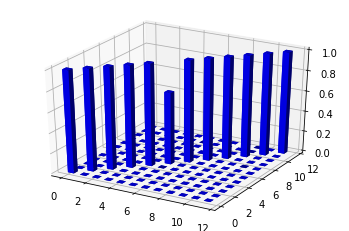

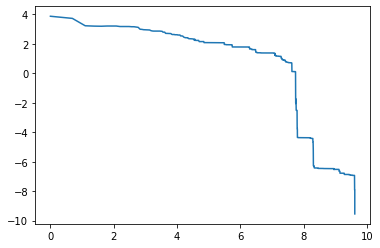

[1 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 1]


d:\logiciels_divers\miniconda\miniconda_intallation\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


In [13]:
# Réseau complet
print("Réseau complet")

# Entrainement 

M = np.transpose(np.array(images))
M[M == 255] = 1

ploterreurs,Msortie,Ptot = algo_gene(M,f=s,prec=0.0001,taille_pop=30,nb_im=12, a=0.8, tmax=50000)

plt.figure()
histogram3D(Msortie)
plt.show()
plt.figure()
plt.plot(np.log(ploterreurs[0]),np.log(ploterreurs[1]))
plt.show()

# Test

for i in range(0,12):
    Test = s(np.dot(Ptot,images[i])).astype(int)
    print(Test)
    